# Всероссийская студенческая Актионада – Кейс-чемпионат «РЕСТАРТ» 2025 по направлению «IT» 2 этап

## Задание 3. Задача на классификацию — Daily Transactions Dataset

**Описание задачи:**

У компании есть выгрузка ежедневных транзакций: дата/время, сумма, способ оплаты, категория и подкатегория покупки, текстовое примечание. В реальности разметку класса операции выполняют специалисты вручную — долго и с риском ошибок.

**Данные:**

- Date — дата и время транзакции;
- Amount — сумма операции;
- Mode — способ оплаты (наличные, банковский счёт/карта и т. п.);
- Category — класс транзакции верхнего уровня (например, Food, Transportation, Festivals, Subscription и др.);
- Subcategory — подкатегория (например, Milk, Train, Netflix и др.);
- Note — краткое текстовое описание покупки (если заполнено).

**Что нужно предсказывать:**

Построить модель, которая автоматически предсказывает класс операции по её признакам.

**Метрика:**

- macro F1 по классам Category + Subcategory.

**Задания:**

1) Визуализируйте распределение транзакций по всем классам (парам Category-Subcategory). Определите 5% наименее представленных классов.

2) Для лучшей из стратегий из Задания 3 примените и сравните три метода борьбы с дисбалансом:

- Взвешивание классов (Class Weight): Использование встроенной балансировки весов классов в модели.
- Семплинг (Sampling): Применение технике SMOTE или ADASYN для увеличения числа примеров миноритарных классов.
- Иерархическое взвешивание: Назначение весов классам, обратно пропорциональных частоте не на уровне подкатегории, а на уровне категории, к которой они принадлежат.

3) Сравните методы по итоговому macro F1-score и отдельно по F1-score для 10 наименее представленных классов. Проанализируйте, не ухудшилась ли точность на частых классах.


### Загрузка и обработка данных 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('Banking_Transactions_USA_2023_2024.csv')
except:
    df = pd.read_csv('C:/Users/Михаил/Banking_Transactions_USA_2023_2024.csv')
df.head()

,Transaction_ID,Account_Number,Transaction_Date,Transaction_Amount,Merchant_Name,Transaction_Type,Category,City,Country,Payment_Method,Customer_Age,Customer_Gender,Customer_Occupation,Customer_Income,Account_Balance,Transaction_Status,Fraud_Flag,Discount_Applied,Loyalty_Points_Earned,Transaction_Description
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,IUPM04409079772781,2023-11-05 15:54:38,3198.94,Houston Group,Debit,Transport,Phoenix,USA,Online Transfer,55,Others,Quality manager,80466.03,350.28,Failed,No,True,304,Recently company detail form range a.
1,23b8c1e9-3924-46de-beb1-3b9046685257,BLAT22216107051843,2024-04-21 22:21:55,129.93,Anderson-Phillips,Credit,Grocery,Philadelphia,USA,Debit Card,26,Others,Civil Service fast streamer,145574.25,9797.81,Pending,Yes,False,383,Anything son baby power heart will not up.
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,UTXA55295806601382,2023-07-17 13:25:56,1378.77,Jensen Group,Credit,Shopping,New York,USA,Debit Card,29,Others,"Pilot, airline",33447.18,12399.85,Failed,Yes,False,497,Form world around green bar environment pattern.
3,972a8469-1641-4f82-8b9d-2434e465e150,XICF70493862044851,2023-06-27 16:09:52,1119.94,"Nelson, Gomez and Rodriguez",Credit,Healthcare,Dallas,USA,Online Transfer,60,Male,"Radiographer, therapeutic",108801.45,16057.64,Failed,Yes,True,495,Order evening source these opportunity trade i...
4,17fc695a-07a0-4a6e-8822-e8f36c031199,KOSW19711121259020,2024-03-26 23:45:31,3683.67,Caldwell Group,Credit,Entertainment,San Jose,USA,E-Wallet,29,Others,Diplomatic Services operational officer,100985.12,14940.54,Failed,Yes,True,292,Exactly politics door suggest.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5389 entries, 0 to 5388
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Transaction_ID           5389 non-null   object 
 1   Account_Number           5389 non-null   object 
 2   Transaction_Date         5389 non-null   object 
 3   Transaction_Amount       5389 non-null   float64
 4   Merchant_Name            5389 non-null   object 
 5   Transaction_Type         5389 non-null   object 
 6   Category                 5389 non-null   object 
 7   City                     5389 non-null   object 
 8   Country                  5389 non-null   object 
 9   Payment_Method           5389 non-null   object 
 10  Customer_Age             5389 non-null   int64  
 11  Customer_Gender          5389 non-null   object 
 12  Customer_Occupation      5389 non-null   object 
 13  Customer_Income          5389 non-null   float64
 14  Account_Balance         

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Transaction_ID,5389,5389,bdd640fb-0667-4ad1-9c80-317fa3b1799d,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account_Number,5389,5389,IUPM04409079772781,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction_Date,5389,5389,2023-11-05 15:54:38,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction_Amount,5389.0,NaN,NaN,NaN,2504.6492,1426.745115,5.46,1283.34,2521.67,3715.92,4999.54
Merchant_Name,5389,4880,Smith PLC,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction_Type,5389,2,Debit,2708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,5389,14,Utilities,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,5389,10,Chicago,589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,5389,1,USA,5389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Payment_Method,5389,5,E-Wallet,1100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print('Дубликатов:', df.duplicated().sum())

Дубликатов: 0


In [6]:
df.isna().sum()

Transaction_ID             0
Account_Number             0
Transaction_Date           0
Transaction_Amount         0
Merchant_Name              0
Transaction_Type           0
Category                   0
City                       0
Country                    0
Payment_Method             0
Customer_Age               0
Customer_Gender            0
Customer_Occupation        0
Customer_Income            0
Account_Balance            0
Transaction_Status         0
Fraud_Flag                 0
Discount_Applied           0
Loyalty_Points_Earned      0
Transaction_Description    0
dtype: int64

### Визуализация данных

In [7]:
category_counts = df['Category'].value_counts()

print("Распределение транзакций по категориям:")
print(category_counts)
print(f"\nВсего уникальных категорий: {len(category_counts)}")

Распределение транзакций по категориям:
Category
Utilities        417
Travel           413
Entertainment    408
Clothing         396
Education        391
Shopping         390
Savings          390
Grocery          389
Electronics      382
Fitness          374
Healthcare       370
Transport        367
Food             355
Housing          347
Name: count, dtype: int64

Всего уникальных категорий: 14


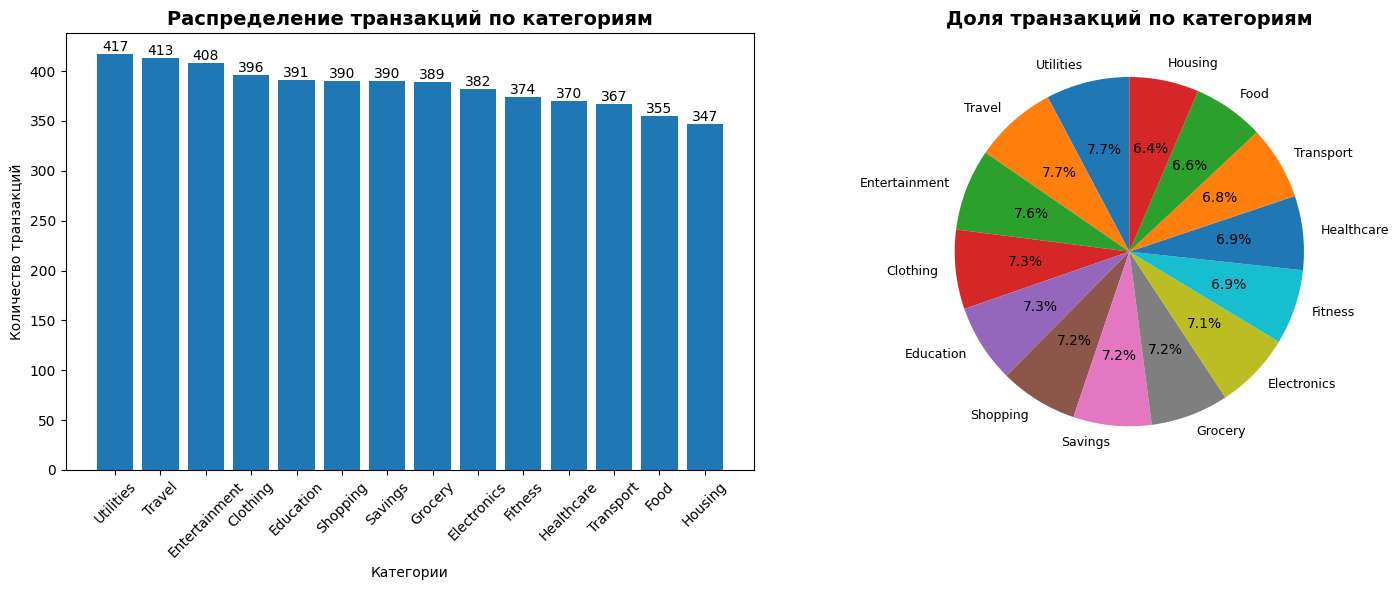

In [8]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

# Визуализация распределения
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Столбчатая диаграмма
bars = ax1.bar(category_counts.index, category_counts.values)
ax1.set_title('Распределение транзакций по категориям', fontsize=14, fontweight='bold')
ax1.set_xlabel('Категории')
ax1.set_ylabel('Количество транзакций')
ax1.tick_params(axis='x', rotation=45)

# Добавляем подписи значений на столбцах
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

# Круговая диаграмма
wedges, texts, autotexts = ax2.pie(category_counts.values, 
                                   labels=category_counts.index, 
                                   autopct='%1.1f%%',
                                   startangle=90)
ax2.set_title('Доля транзакций по категориям', fontsize=14, fontweight='bold')

for text in texts:
    text.set_fontsize(9)

plt.tight_layout()
plt.show()

In [9]:
# Определяем 5% наименее представленных классов
total_categories = len(category_counts)
num_5_percent = max(1, int(np.ceil(total_categories * 0.05)))  # Не менее 1 категории

least_represented = category_counts.tail(num_5_percent)

print(f"\n5% наименее представленных категорий ({num_5_percent} из {total_categories}):")
print("=" * 50)
for category, count in least_represented.items():
    percentage = (count / len(df)) * 100
    print(f"{category}: {count} транзакций ({percentage:.2f}%)")


5% наименее представленных категорий (1 из 14):
Housing: 347 транзакций (6.44%)


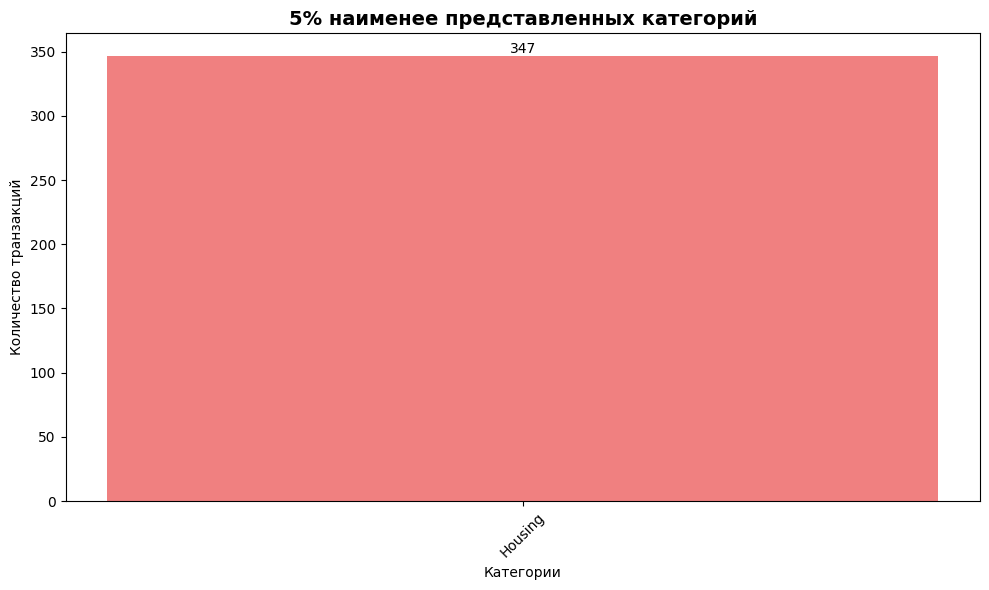

In [10]:
plt.figure(figsize=(10, 6))
bars = plt.bar(least_represented.index, least_represented.values, color='lightcoral')
plt.title('5% наименее представленных категорий', fontsize=14, fontweight='bold')
plt.xlabel('Категории')
plt.ylabel('Количество транзакций')
plt.xticks(rotation=45)
    
# Добавляем подписи значений
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

In [11]:
# Статистика по распределению
print("\n" + "="*50)
print("СТАТИСТИКА ПО РАСПРЕДЕЛЕНИЮ:")
print("="*50)
print(f"Общее количество транзакций: {len(df)}")
print(f"Количество уникальных категорий: {len(category_counts)}")
print(f"Самая частая категория: '{category_counts.index[0]}' ({category_counts.iloc[0]} транзакций)")
print(f"Самая редкая категория: '{category_counts.index[-1]}' ({category_counts.iloc[-1]} транзакций)")
print(f"Медианное количество транзакций на категорию: {category_counts.median():.1f}")


СТАТИСТИКА ПО РАСПРЕДЕЛЕНИЮ:
Общее количество транзакций: 5389
Количество уникальных категорий: 14
Самая частая категория: 'Utilities' (417 транзакций)
Самая редкая категория: 'Housing' (347 транзакций)
Медианное количество транзакций на категорию: 389.5


**Вывод:**

1. Сбалансированность данных

- Распределение транзакций по категориям относительно равномерное. Разница между самой частой (Utilities - 417 транзакций) и самой редкой (Housing - 347 транзакций) категорией составляет всего 70 транзакций (16.8%). Медианное значение 389.5 транзакций подтверждает сбалансированность.

2. Наименее представленные категории

- 5% наименее представленных категорий составляет 1 категория (Housing). Категория Housing содержит 347 транзакций (6.44% от общего объема). Несмотря на то, что это наименее представленная категория, ее доля все равно значительна.

3. Структура расходов

- Ведущие категории: Utilities, Travel, Entertainment (более 400 транзакций каждая). Все 14 категорий имеют достаточно представительные объемы данных (от 347 до 417 транзакций). Отсутствуют категории с экстремально малым количеством транзакций.